In [79]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [80]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [85]:
#train & test 데이터 생성
train_datagen = ImageDataGenerator(
    rescale=1/255, #데이터 정규화
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.2,1.0],
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    rescale=1/255, #데이터 정규화
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.2,1.0],
    horizontal_flip=True) 

training_set = train_datagen.flow_from_directory(
    './dataset/train',
    target_size=(256, 256),
    batch_size=4,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(
    './dataset/test',
    target_size=(256, 256),
    batch_size=3,
    class_mode='binary')

# validation_generator = test_datagen.flow_from_directory(
#     './dataset/validation',
#     target_size=(256, 256),
#     batch_size=3,
#     class_mode='binary')

Found 50 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


In [89]:
hist = model.fit_generator(
    training_set,
    steps_per_epoch = 13,
    epochs= 10 ,
    validation_data = test_set,
    validation_steps = 7)

NameError: name 'epochs' is not defined

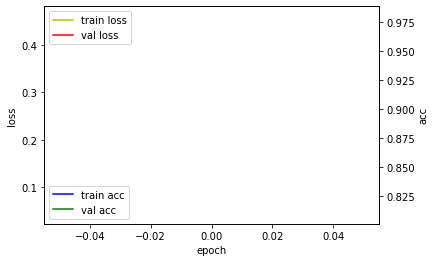

TypeError: data type not understood

In [87]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('acc')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

print(model)

#모델 저장
model.save('./model.h5')

In [76]:
def predict(self,test_path):
            test_datagen = ImageDataGenerator(rescale=1. / 255)
            test_set = test_datagen.flow_from_directory(test_path,
                                                             target_size=(256,256),
                                                             batch_size=3,
                                                             class_mode='binary')

            if self.classifier is not None:
                output = self.classifier.predict_generator(test_set, steps=1)
                return test_set.class_indices, output
            else:
                print('학습모델이 없습니다.')
